<h1 align="center" style="color:blue">Finding customer who might default on credit card classification approach </h1>

<h2>import libraries </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

<h2>Load Dataset </h2>

In [2]:
df_customers = pd.read_csv('D:/Desktop/OneDrive - shivameducation.net/Documents/AJIT_YADAV/CodeBasicsBootCamp/CodeBasicsProjects/ML-Projects/CreditRisk-ClassificationProject/MainProject/data/customers.csv')
df_loans = pd.read_csv('D:/Desktop/OneDrive - shivameducation.net/Documents/AJIT_YADAV/CodeBasicsBootCamp/CodeBasicsProjects/ML-Projects/CreditRisk-ClassificationProject/MainProject/data/loans.csv')   
df_bureau = pd.read_csv('D:/Desktop/OneDrive - shivameducation.net/Documents/AJIT_YADAV/CodeBasicsBootCamp/CodeBasicsProjects/ML-Projects/CreditRisk-ClassificationProject/MainProject/data/bureau_data.csv')


In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
# merge all the dataframes into one dataframe so that we can do EDA and build the model on it.
df = df_customers.merge(df_loans, on='cust_id')
df = pd.merge(df, df_bureau, on='cust_id')
df.shape

(50000, 33)

In [5]:
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [7]:
# convert default to int type from boolean type so that we can do EDA on it.
df['default'] = df['default'].astype(int)
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

<h2>Split the Data as First Step to avoid Data Leakage </h2>

1. Understand the concept of Data Leakage and Target leakage
2. to avoid data leakage .. we should split data into train and test set ...as first step and then perform EDA process on train set
3. so exlude test data set totally from EDA process of train set


In [8]:
# split data into target and features
X = df.drop(['default'], axis="columns")
y = df['default']

# apply traint test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

<h3> check for missing values </h3>

In [9]:
# to avoid data leakage we will do EDA on train data only and then apply the same transformations on test data.
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [10]:
df_test.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 15
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [11]:
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [12]:
# mode of residence_type
mode_residence = df_train['residence_type'].mode()[0]

In [13]:
# replace all nan values in residence_type with mode
df_train['residence_type'] = df_train['residence_type'].fillna(mode_residence)
df_train['residence_type'].unique()


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [14]:
# replace nan values in test data with mode of residence_type from train data
df_test['residence_type'] = df_test['residence_type'].fillna(mode_residence)

<h3> check for duplicate values </h3>

In [15]:
# check for ducplicate values in train and test data
df_train.duplicated().sum() , df_test.duplicated().sum()


(np.int64(0), np.int64(0))

<h2> seperate out numeric and categoric columns </h2>

In [16]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [17]:
# continous columns in train data
continous_cols = df_train.select_dtypes(include=np.number).columns.tolist()
# we changed default to int type so we will remove it from continous columns list as it's by nature a categorical column
continous_cols.remove('default')
continous_cols

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

In [18]:
# continous columns in test data
continous_cols = df_test.select_dtypes(include=np.number).columns.tolist()
# we changed default to int type so we will remove it from continous columns list as it's by nature a categorical column
continous_cols.remove('default')
continous_cols

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

In [19]:
# categorical columns in train data and include default column as well because it is of int type but it is a categorical variable.
categorical_cols = df_train.select_dtypes(include='object').columns.tolist()
categorical_cols.append('default')
categorical_cols.append('zipcode')

categorical_cols

['cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt',
 'default',
 'zipcode']

In [20]:
# categorical columns in test data and include default column as well because it is of int type but it is a categorical variable.
categorical_cols = df_test.select_dtypes(include='object').columns.tolist()
categorical_cols.append('default')
categorical_cols.append('zipcode')

categorical_cols

['cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt',
 'default',
 'zipcode']

<h2 align="center" style="color:blue"> Data Cleaning </h2>

<h3> check for outliers in continous & categorical columns </h3>

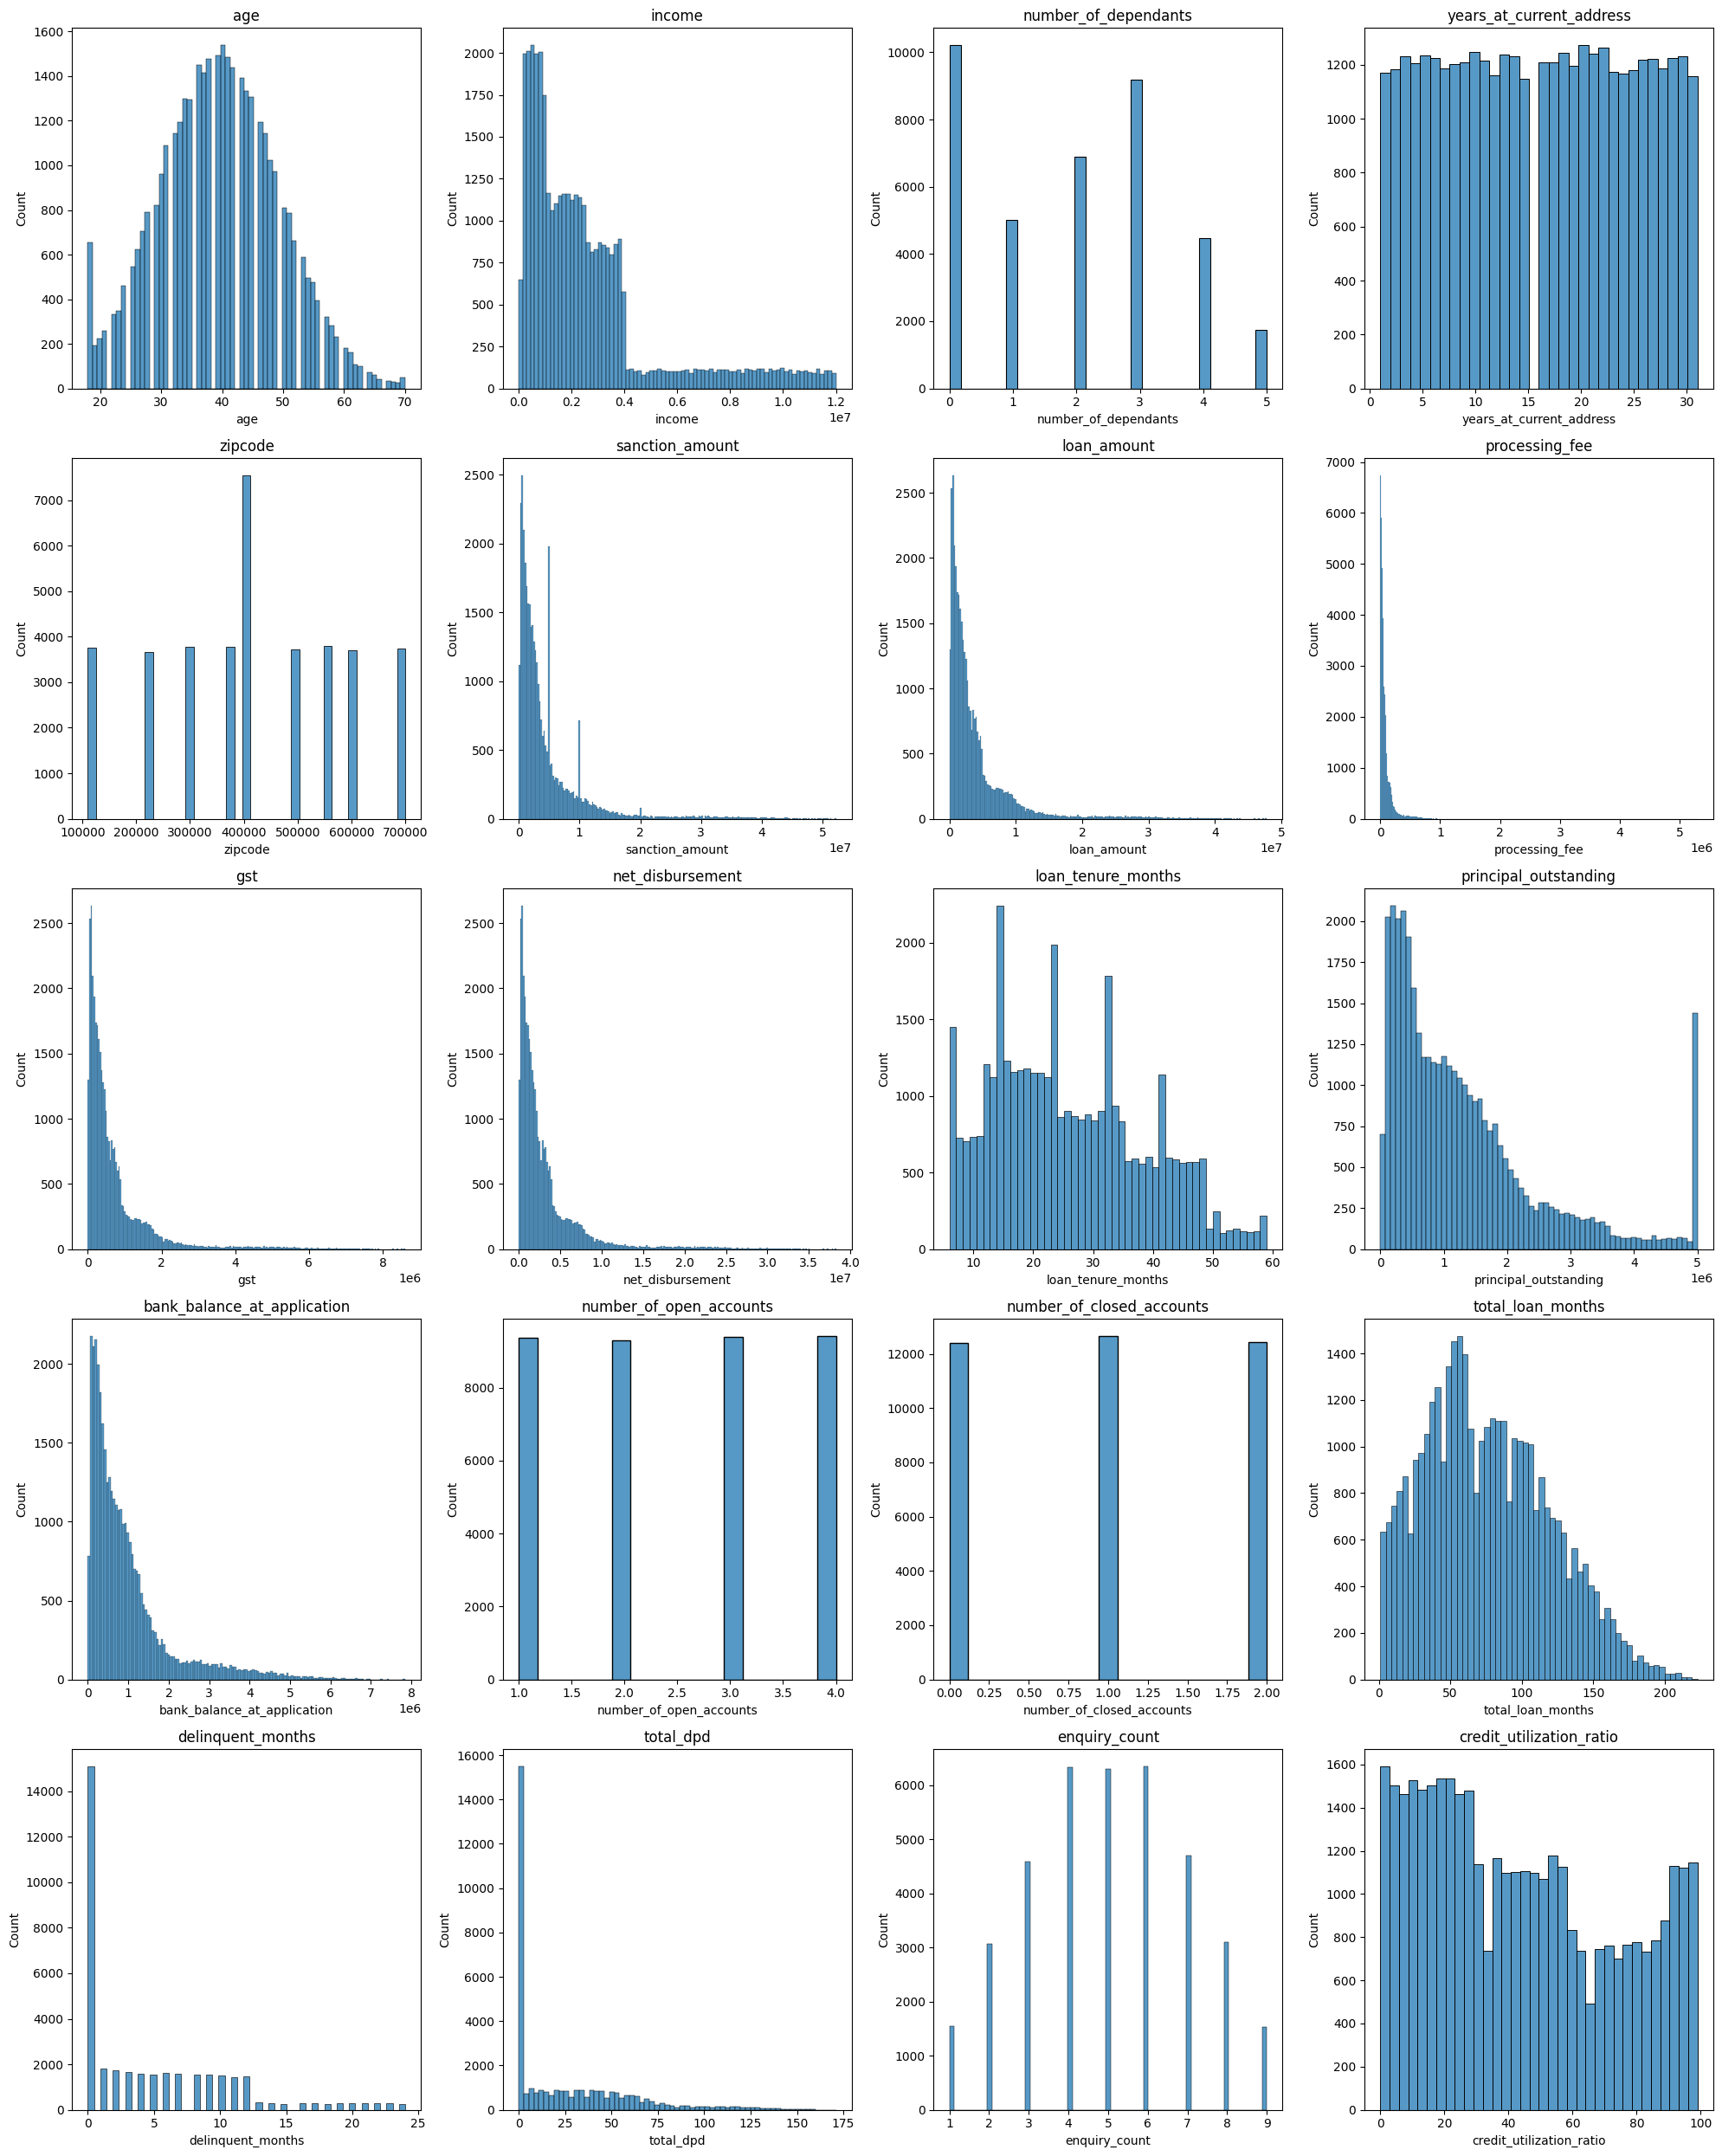

In [21]:
# outliers in continous columns
num_plots = len(continous_cols)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
axes = axes.flatten()
for i, col in enumerate(continous_cols):
    sns.histplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, num_rows*num_cols):
    (axes[j].axis('off'))
plt.tight_layout()
plt.show()

In [22]:
# treat processing fee 
df_train['processing_fee'].describe()

count    3.750000e+04
mean     8.029068e+04
std      1.131281e+05
min      0.000000e+00
25%      1.922000e+04
50%      4.460000e+04
75%      9.242000e+04
max      5.293544e+06
Name: processing_fee, dtype: float64

In [23]:
# track the row where processing_fee > loan_amount  and print it's loan_amount and processing_fee
df_train[df_train['processing_fee'] > df_train['loan_amount']][['loan_amount', 'processing_fee']]



,loan_amount,processing_fee
23981,2234000,2.669791e+06
28174,966000,1.214493e+06
47089,1738000,1.858965e+06
29305,2616000,3.036378e+06
9898,3626000,5.293544e+06


In [24]:
# filter outlier where percent difference is more than 3%
df_train[df_train['processing_fee']/df_train['loan_amount'] > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2.669791e+06
28174,966000,1.214493e+06
47089,1738000,1.858965e+06
29305,2616000,3.036378e+06
9898,3626000,5.293544e+06


In [25]:
# so filter out these 5 rows from train data
df_train_1 = df_train[df_train['processing_fee']/df_train['loan_amount'] < 0.03]

# cross check if we have removed the outliers or not
#df_train_1[df_train_1['processing_fee']/df_train_1['loan_amount'] > 0.03][['loan_amount', 'processing_fee']]

In [26]:
# apply above steps on test data as well
# so filter out these 5 rows from train data
df_test_1 = df_test[df_test['processing_fee']/df_test['loan_amount'] < 0.03]

# cross check if we have removed the outliers or not
#df_test_1[df_test_1['processing_fee']/df_test_1['loan_amount'] > 0.03][['loan_amount', 'processing_fee']]


<h3>Treat Categorical Columns </h3>

In [27]:
categorical_cols

['cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt',
 'default',
 'zipcode']

In [28]:
# print the unique values in each categorical column
for col in categorical_cols:
    print(f"Unique values in {col}: {df_train_1[col].unique()}")

Unique values in cust_id: ['C12747' 'C32496' 'C43676' ... 'C45237' 'C49229' 'C37785']
Unique values in gender: ['M' 'F']
Unique values in marital_status: ['Married' 'Single']
Unique values in employment_status: ['Self-Employed' 'Salaried']
Unique values in residence_type: ['Owned' 'Mortgage' 'Rented']
Unique values in city: ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
Unique values in state: ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
Unique values in loan_id: ['L12747' 'L32496' 'L43676' ... 'L45237' 'L49229' 'L37785']
Unique values in loan_purpose: ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
Unique values in loan_type: ['Secured' 'Unsecured']
Unique values in disbursal_date: ['2020-10-31' '2022-10-22' '2023-12-04' ... '2022-02-07' '2019-10-30'
 '2022-10-04']
Unique values in installment_start_dt: ['2020-11-11' '2022-10-27' '2023-12-29' ... '2024-08-19' 

In [29]:
# replace personaal with personal in loan_purpose column
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_train_1['loan_purpose'].unique()

C:\Users\anite\AppData\Local\Temp\ipykernel_19052\3018990494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')


array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [30]:
# replace personaal with personal in residence_type column in test data as well
df_test_1['loan_purpose'] = df_test_1['loan_purpose'].replace('Personaal', 'Personal')

C:\Users\anite\AppData\Local\Temp\ipykernel_19052\3981506834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_1['loan_purpose'] = df_test_1['loan_purpose'].replace('Personaal', 'Personal')


<h2 align="center" style="color:blue">Explorartry data analysis </h2>

In [31]:
continous_cols

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

Insights: orage graph shows that people in younger age default rate is high

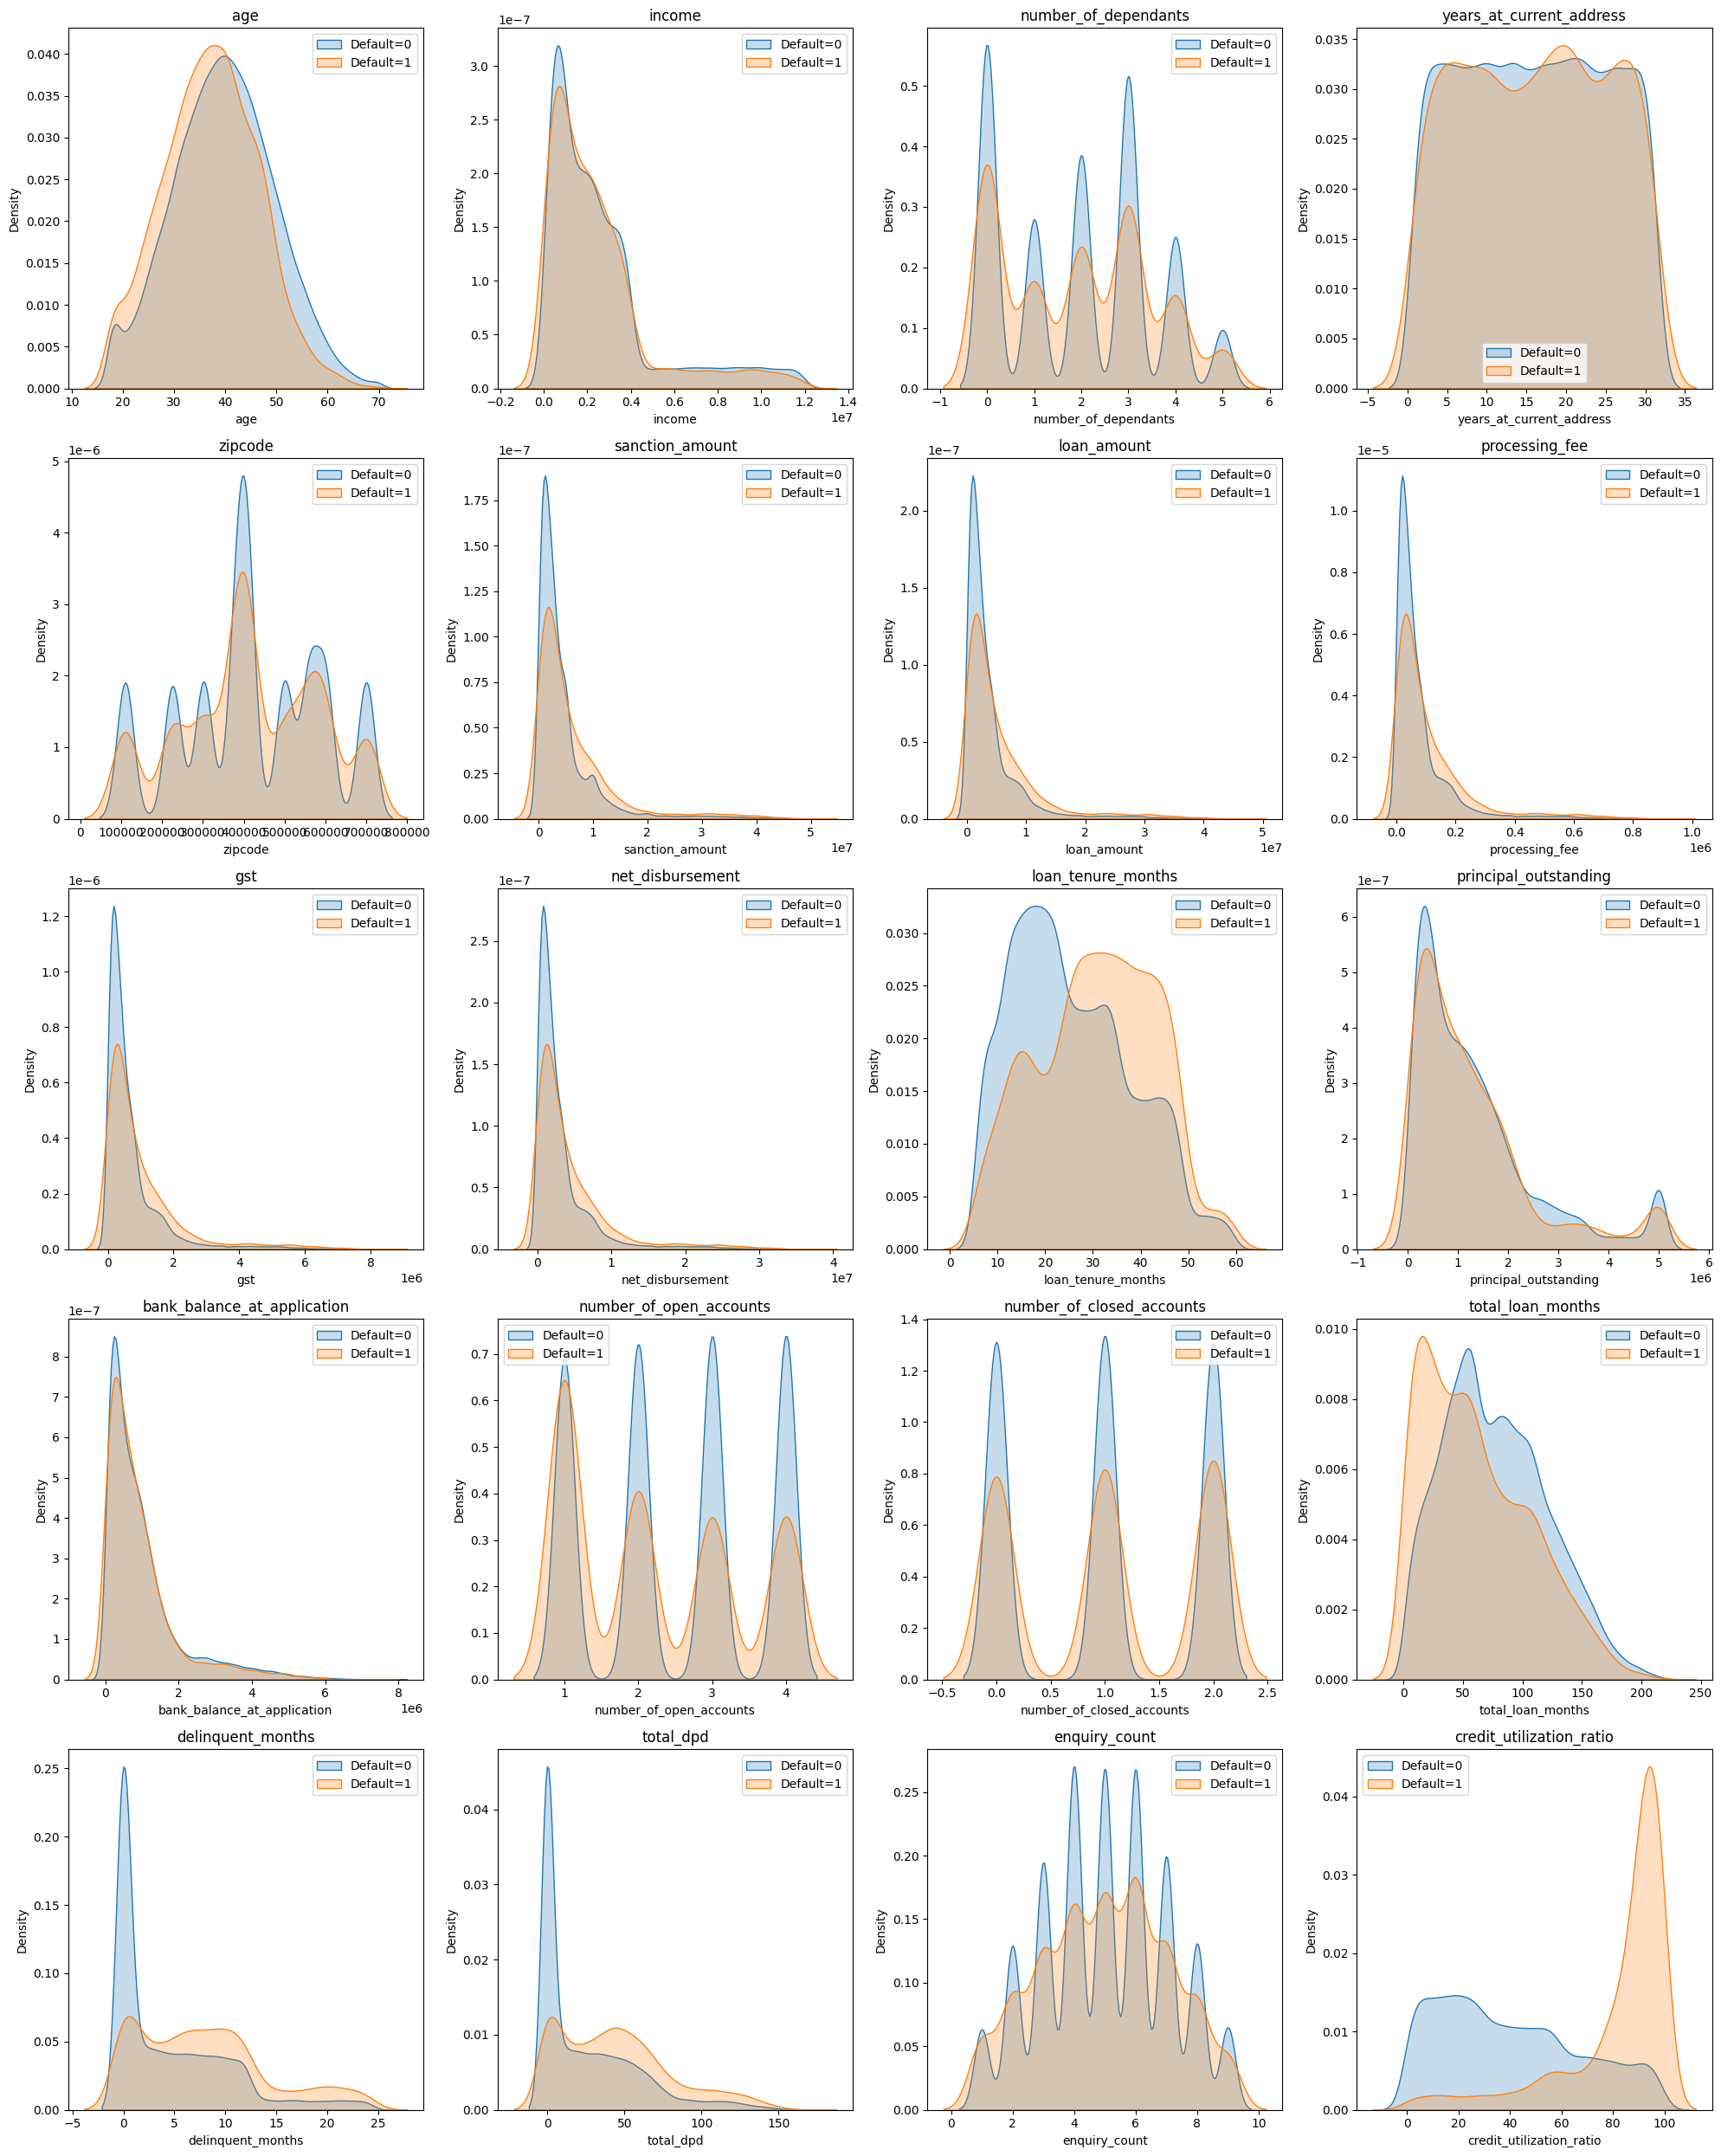

In [32]:
# plot kde plot for continous columns
num_plots = len(continous_cols)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
axes = axes.flatten()
for i, col in enumerate(continous_cols):
    sns.kdeplot(data=df_train_1[df_train_1['default']==0], x=col, fill=True, label='Default=0', ax=axes[i])
    sns.kdeplot(data=df_train_1[df_train_1['default']==1], x=col, fill=True, label='Default=1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].legend()
for j in range(i+1, num_rows*num_cols):
    (axes[j].axis('off'))
plt.tight_layout()
plt.show()

<h3 align="center" style="color:blue">Insights</h3>

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

<h2 align="center" style="color:blue"> Feature Engineering </h2>

<h3>Suggestions for feature Engineering</h3>
<p>Loan to income ratio is a better metric loan amount and income as individual feature</p>
<p>Average dpd per delinquent month is better compared tp total dpd</P>

C:\Users\anite\AppData\Local\Temp\ipykernel_19052\2300209355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1['loan_to_income_ratio'] = round(df_train_1['loan_amount'] / df_train_1['income'],2)


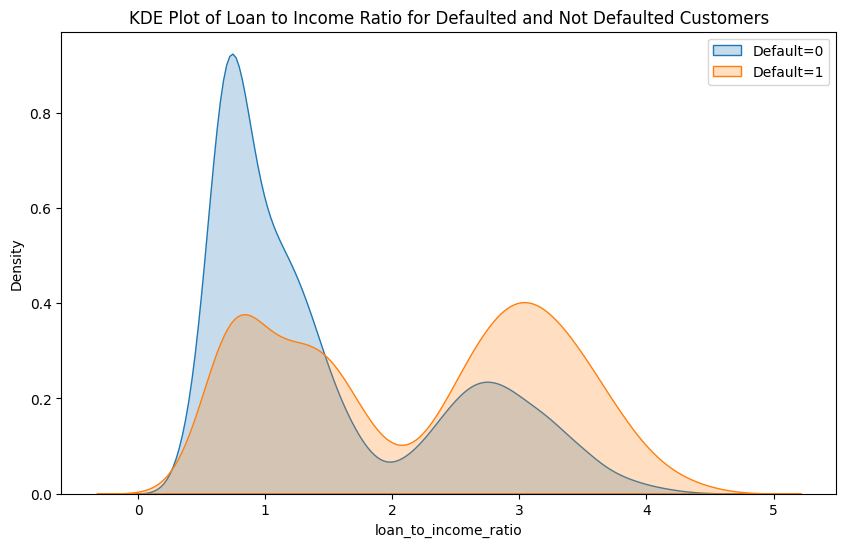

In [33]:
# create a loan to income ratio column
df_train_1['loan_to_income_ratio'] = round(df_train_1['loan_amount'] / df_train_1['income'],2)

#plot kde plot for loan_to_income_ratio column w.r.t. default column
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_train_1[df_train_1['default']==0], x='loan_to_income_ratio', fill=True, label='Default=0')
sns.kdeplot(data=df_train_1[df_train_1['default']==1], x='loan_to_income_ratio', fill=True, label='Default=1')
plt.title('KDE Plot of Loan to Income Ratio for Defaulted and Not Defaulted Customers')
plt.legend()
plt.show()


In [34]:
df_test_1['loan_to_income_ratio'] = round(df_test_1['loan_amount'] / df_test_1['income'],2)

C:\Users\anite\AppData\Local\Temp\ipykernel_19052\2974167523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_1['loan_to_income_ratio'] = round(df_test_1['loan_amount'] / df_test_1['income'],2)


<h3>Insights</h3>
<p>1. Blue graph has majority of its values on lower side of LTI</p>
<p>2. Orange graph has many values when LTI is higher indicating that higher LTI means high risk loan</p>

<h3>Delinquincy Ratio</h3>

In [35]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)
df_test_1['delinquency_ratio'] = (df_test_1['delinquent_months']*100 / df_test_1['total_loan_months']).round(1)

C:\Users\anite\AppData\Local\Temp\ipykernel_19052\3743202321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)
C:\Users\anite\AppData\Local\Temp\ipykernel_19052\3743202321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_1['delinquency_ratio'] = (df_test_1['delinquent_months']*100 / df_test_1['total_loan_months']).round(1)


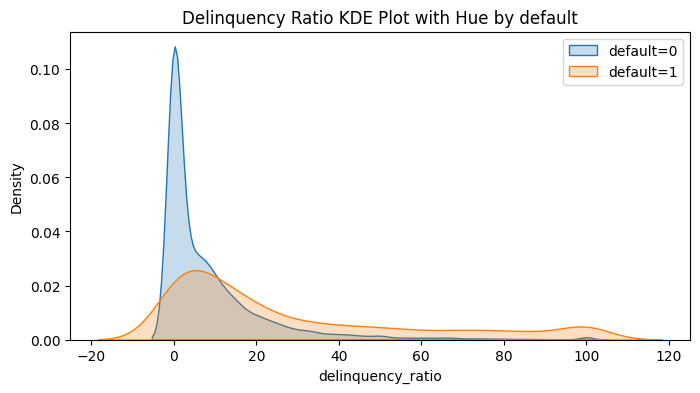

In [36]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

<h3>Insights</h3>
<p>1. Blue graph has majority of its values on lower side of LTI</p>
<p>2. Orange graph has many values when delinquency ratio is higher indicating some correlation on default</p>

In [37]:
# avg DPD per delinquency
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)

df_test_1['avg_dpd_per_delinquency'] = np.where(
    df_test_1['delinquent_months'] != 0,
    (df_test_1['total_dpd'] / df_test_1['delinquent_months']).round(1),
    0
)

C:\Users\anite\AppData\Local\Temp\ipykernel_19052\2806457580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1['avg_dpd_per_delinquency'] = np.where(
C:\Users\anite\AppData\Local\Temp\ipykernel_19052\2806457580.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_1['avg_dpd_per_delinquency'] = np.where(


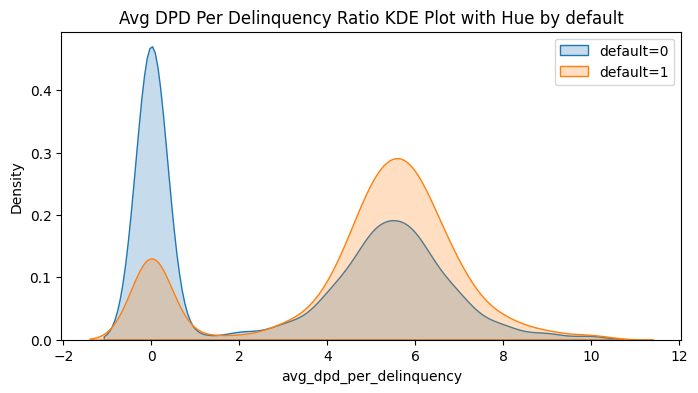

In [38]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

Insights

1. Graph clearly shows more occurances of default cases when avg_dpd_per_delinquency is high. This means this column is a strong predictor

<h2>Remove columns that are just unique ids and don't have influence on target</h2>

In [39]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'],axis="columns")
df_test_2 = df_test_1.drop(['cust_id', 'loan_id'],axis="columns")

<h2>Removing columns that don't have too much impact on target values </h2>

In [40]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test_3 = df_test_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [41]:
df_test_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

### VIF to measure multicolinearity

In [42]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,avg_dpd_per_delinquency
count,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.00000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000
mean,0.414240,0.388903,0.499918,0.523517,0.088840,0.082513,0.082513,0.082513,0.376631,0.261615,0.123550,0.500925,0.50056,0.501077,0.438653,0.294312,0.103299,0.328391
std,0.189590,0.307182,0.297364,0.286491,0.120117,0.112480,0.112480,0.112480,0.234860,0.244461,0.133275,0.373040,0.40701,0.253666,0.296902,0.228030,0.172985,0.290663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020555,0.018963,0.018963,0.018963,0.188679,0.077988,0.034205,0.000000,0.00000,0.375000,0.181818,0.110070,0.000000,0.000000
50%,0.403846,0.400000,0.500000,0.491525,0.049364,0.045516,0.045516,0.045516,0.339623,0.193870,0.082515,0.666667,0.50000,0.500000,0.393939,0.201405,0.037000,0.430000
75%,0.538462,0.600000,0.766667,0.762712,0.098027,0.095555,0.095555,0.095555,0.547170,0.352418,0.155192,1.000000,1.00000,0.625000,0.676768,0.505855,0.129000,0.572500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3>Same transformation on test set</h3>

In [43]:
X_test = df_test_3.drop('default', axis='columns')
y_test = df_test_3['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,avg_dpd_per_delinquency
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,0.415001,0.384892,0.502697,0.525015,0.089218,0.082800,0.082800,0.082800,0.375092,0.264632,0.124944,0.497293,0.500440,0.501470,0.436038,0.293038,0.106074,0.333844
std,0.188773,0.306871,0.298103,0.286179,0.120844,0.112877,0.112877,0.112877,0.233792,0.245290,0.134708,0.372576,0.407226,0.253618,0.295418,0.226176,0.173081,0.289680
min,0.000000,0.000000,0.000000,0.000000,-0.000019,-0.000126,-0.000126,-0.000126,0.000000,0.000163,0.000668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020958,0.019387,0.019387,0.019387,0.188679,0.079715,0.034167,0.000000,0.000000,0.375000,0.181818,0.112412,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.510169,0.050189,0.046249,0.046249,0.046249,0.339623,0.198239,0.084024,0.333333,0.500000,0.500000,0.393939,0.201405,0.042000,0.440000
75%,0.538462,0.600000,0.766667,0.762712,0.097422,0.094927,0.094927,0.094927,0.547170,0.356914,0.157792,0.666667,1.000000,0.625000,0.676768,0.498829,0.134000,0.580000
max,1.000000,1.000000,1.000000,1.000000,0.981249,0.963717,0.963717,0.963717,1.000000,1.000000,0.939154,1.000000,1.000000,1.000000,1.000000,1.004684,1.000000,1.000000


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [45]:
calculate_vif(X_train[cols_to_scale])

c:\Users\anite\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.700665
1,number_of_dependants,2.730312
2,years_at_current_address,3.422577
3,zipcode,3.797524
4,sanction_amount,101.086559
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.180519
9,principal_outstanding,16.326471


In [46]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [47]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_test_1 = X_test.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_test_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [48]:
calculate_vif(X_train_1[numeric_columns])

,Column,VIF
0,age,5.429171
1,number_of_dependants,2.726774
2,years_at_current_address,3.403712
3,zipcode,3.777885
4,loan_tenure_months,6.018724
5,bank_balance_at_application,1.804693
6,number_of_open_accounts,4.353487
7,number_of_closed_accounts,2.372449
8,enquiry_count,6.384110
9,credit_utilization_ratio,2.919822


In [49]:
categorical_columns = X_train_1.select_dtypes('object').columns
categorical_columns

Index(['gender', 'marital_status', 'employment_status', 'residence_type',
       'city', 'state', 'loan_purpose', 'loan_type'],
      dtype='object')

In [50]:
continous_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
continous_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

<h2>Measuring influence of Categorical Variables on Target variables</h2>
<h3>Understand weight of evidence and information value..mainly applicable to categorical featuresm in classification problem </h3>

<h2 align="center" style="color:blue">Feature Engineering for Categorical Values Using weight of evidence & information value</h2>

In [51]:
categorical_columns

Index(['gender', 'marital_status', 'employment_status', 'residence_type',
       'city', 'state', 'loan_purpose', 'loan_type'],
      dtype='object')

In [52]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.101458,0.207792,-0.716891,0.076230
Education,5620,559,5061,0.173441,0.147702,0.160642,0.004135
Home,11304,1734,9570,0.538008,0.279294,0.655609,0.169616
Personal,13117,603,12514,0.187093,0.365212,-0.668874,0.119140


In [53]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income_ratio': np.float64(0

In [54]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income_ratio,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [55]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income_ratio',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

<h2>Feature Encoding</h2>

In [56]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test_1[selected_features_iv]

In [57]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False


In [58]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False
30367,0.231,0.547,0.667,0.828,0.180,0.000,0.000,True,False,False,False,False,False


<h2 align="center" style="color:blue">Train Model </h2>

<h3>Attempt 1 </h3>
<p>Logistic Regression, RandomForest & XGB </p>
<p>No handling of class imbalance </p>

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [60]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.71      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.92      0.85      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [61]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.76      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.87      0.89     12497
weighted avg       0.96      0.97      0.96     12497



Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

<h2>RandomizedSearch CV for Attempt 1: Logistic Regression </h2>

In [62]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'liblinear', 'C': np.float64(1438.44988828766)}
Best Score: 0.7578820896729832
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



<h2>RandomizedSearch CV for Attempt 1: XGBoost </h2>

In [63]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7883672970285227
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.84      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.91      0.89     12497
weighted avg       0.97      0.96      0.96     12497



Still we are not getting recall score more than 90% so i need to figure out other techniques

<h2> Attempt 2 </h2>

<p>. Logistic Regression & XGB</p>1
<p>1. Handle Class Imbalance Using Under Sampling</p>

In [64]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

in above case we have equal number of o and 1..so class imbalance is handled

In [65]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



recall score is improved now ..as we are dealing with balanced rows for default=0 and default=1. precision greater than 50% is fine

In [66]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.98      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



<h2>Attempt :3...using oversampling </h2>
<p>Logistic Regression </p>
<p>Handle Class Imbalance Using SMOTE Tomek</p>
<p>Parameter tunning using optuna</p>

In [67]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34195
1    34195
Name: count, dtype: int64

In [68]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



alternatively we can also use optuna ..it is an efficient approach to find best parameters using techniques such as 
gradient optimization

<h2>Hyper parameter tuning Using Optuna </h2>

In [69]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [70]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2026-02-21 17:07:36,431] A new study created in memory with name: no-name-d873df74-678b-4405-b758-a601d0749d0f
[I 2026-02-21 17:07:36,680] Trial 0 finished with value: 0.9290507503218833 and parameters: {'C': 0.009327488045595038, 'solver': 'newton-cg', 'tol': 0.0009612634412886515, 'class_weight': None}. Best is trial 0 with value: 0.9290507503218833.
[I 2026-02-21 17:07:37,014] Trial 1 finished with value: 0.9456934854920926 and parameters: {'C': 65.28947317205694, 'solver': 'liblinear', 'tol': 0.003235588914066767, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9456934854920926.
[I 2026-02-21 17:07:37,159] Trial 2 finished with value: 0.8368314233569668 and parameters: {'C': 0.0001621617697000739, 'solver': 'lbfgs', 'tol': 0.0016936144785066841, 'class_weight': None}. Best is trial 1 with value: 0.9456934854920926.
[I 2026-02-21 17:07:37,386] Trial 3 finished with value: 0.942636005501902 and parameters: {'C': 0.1617980834079379, 'solver': 'saga', 'tol': 0.00171919902

In [71]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9458095012220697
  Params: 
    C: 5.080058422311526
    solver: liblinear
    tol: 1.113274771672264e-05
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



<h2>Attempt:4 </h2>
<p>XGBoost</p>
<p>Handle Class Imbalance Using SMOTE Tomek</p>
<p>Parameter tunning using optuna</p>

In [72]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2026-02-21 17:07:50,487] A new study created in memory with name: no-name-29904713-ce9e-418a-ae81-e64a3a36ed54


[I 2026-02-21 17:07:51,370] Trial 0 finished with value: 0.9612760167452982 and parameters: {'lambda': 0.007220953579592717, 'alpha': 0.5049566272608293, 'subsample': 0.505163835367813, 'colsample_bytree': 0.497659845344249, 'max_depth': 9, 'eta': 0.25877675267189065, 'gamma': 7.301355552954377, 'scale_pos_weight': 7.761182897621318, 'min_child_weight': 9, 'max_delta_step': 2}. Best is trial 0 with value: 0.9612760167452982.
[I 2026-02-21 17:07:52,536] Trial 1 finished with value: 0.9604654754700738 and parameters: {'lambda': 0.009958968557445215, 'alpha': 0.5597306298264048, 'subsample': 0.5526887249250845, 'colsample_bytree': 0.5226709010222623, 'max_depth': 9, 'eta': 0.09906426324383552, 'gamma': 2.2019585794640992, 'scale_pos_weight': 5.34598202995479, 'min_child_weight': 9, 'max_delta_step': 3}. Best is trial 0 with value: 0.9612760167452982.
[I 2026-02-21 17:07:53,595] Trial 2 finished with value: 0.9470167867061935 and parameters: {'lambda': 0.009252523539376778, 'alpha': 0.1647

In [73]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9759566763181272
  Params: 
    lambda: 0.014565699970209114
    alpha: 0.23500640874769144
    subsample: 0.4740450616403531
    colsample_bytree: 0.7323634642542965
    max_depth: 10
    eta: 0.2657555250017733
    gamma: 0.6482997744148545
    scale_pos_weight: 1.5344988917340467
    min_child_weight: 3
    max_delta_step: 9
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.73      0.84      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.86      0.90      0.88     12497
weighted avg       0.96      0.96      0.96     12497



<h2>Best Model </h2>

<h2>Model Evaluation: ROC/AUC </h2>

In [74]:

y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [75]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.75426771e-05,
        8.75426771e-05]),
 array([0.        , 0.0009311 , 0.16014898, 0.16014898, 0.17690875]),
 array([       inf, 1.        , 0.99944702, 0.99944007, 0.99931046]))

In [76]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.9836706008704383

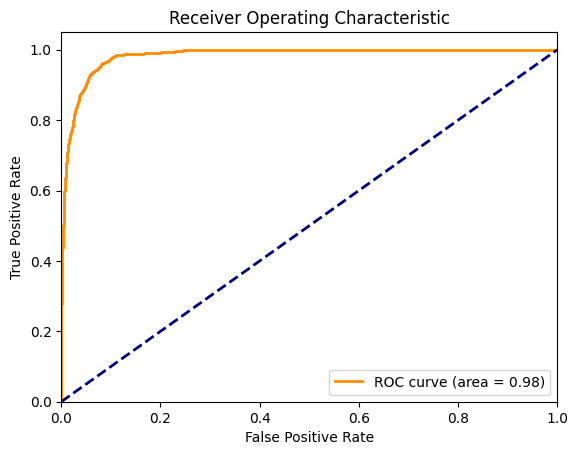

In [77]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<h2>Model Evaluation : Rankordering, KS statistic, Gini coeff </h2>
<p>it is supposed to be the Gold statistics </p>

In [78]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.532
15514,0,0.000
30367,0,0.006


In [79]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.532,8
15514,0,0.000,2
30367,0,0.006,6


In [80]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.000
mean       0.486
std        0.182
min        0.214
25%        0.319
50%        0.469
75%        0.641
max        0.819
Name: Default Probability, dtype: float64

In [81]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\anite\AppData\Local\Temp\ipykernel_19052\4037021561.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.004,0.000,1249.000
6,6,0.004,0.030,5.000,1245.000
7,7,0.030,0.214,9.000,1240.000
8,8,0.214,0.819,161.000,1089.000
9,9,0.819,1.000,899.000,351.000


In [82]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.004,0.000,1249.000,0.000,100.000
6,6,0.004,0.030,5.000,1245.000,0.400,99.600
7,7,0.030,0.214,9.000,1240.000,0.721,99.279
8,8,0.214,0.819,161.000,1089.000,12.880,87.120
9,9,0.819,1.000,899.000,351.000,71.920,28.080


In [83]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.819,1.000,899.000,351.000,71.920,28.080
1,8,0.214,0.819,161.000,1089.000,12.880,87.120
2,7,0.030,0.214,9.000,1240.000,0.721,99.279
3,6,0.004,0.030,5.000,1245.000,0.400,99.600
4,5,0.001,0.004,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [84]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.819,1.000,899.000,351.000,71.920,28.080,899.000,351.000
1,8,0.214,0.819,161.000,1089.000,12.880,87.120,1060.000,1440.000
2,7,0.030,0.214,9.000,1240.000,0.721,99.279,1069.000,2680.000
3,6,0.004,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000
4,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [85]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.819,1.000,899.000,351.000,71.920,28.080,899.000,351.000,83.706,3.073
1,8,0.214,0.819,161.000,1089.000,12.880,87.120,1060.000,1440.000,98.696,12.606
2,7,0.030,0.214,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461
3,6,0.004,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361
4,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [86]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.819,1.000,899.000,351.000,71.920,28.080,899.000,351.000,83.706,3.073,80.633
1,8,0.214,0.819,161.000,1089.000,12.880,87.120,1060.000,1440.000,98.696,12.606,86.090
2,7,0.030,0.214,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461,76.073
3,6,0.004,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**


In [87]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9836706008704383
Gini Coefficient: 0.9673412017408767


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

<h1> Finalize The Model and Visualize Feature Importance </h1>

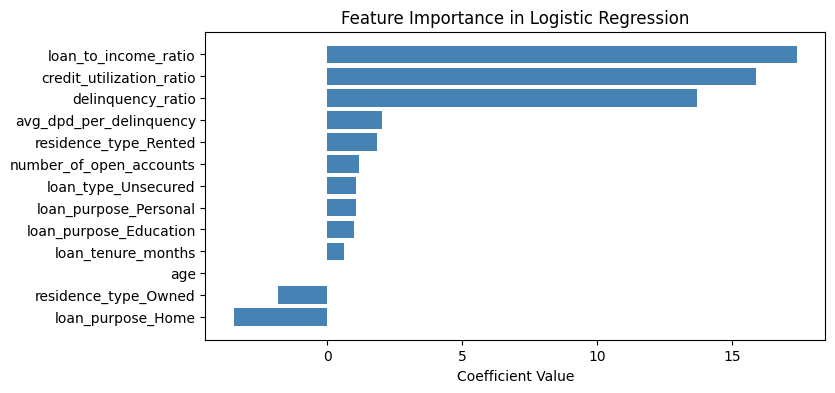

In [88]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

<h2> Save the Model </h2>

In [89]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False


In [90]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income_ratio', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [91]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [92]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income_ratio', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [93]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'D:/Desktop/OneDrive - shivameducation.net/Documents/AJIT_YADAV/CodeBasicsBootCamp/CodeBasicsProjects/ML-Projects/CreditRisk-ClassificationProject/MainProject/artifacts/model_data.joblib')

['D:/Desktop/OneDrive - shivameducation.net/Documents/AJIT_YADAV/CodeBasicsBootCamp/CodeBasicsProjects/ML-Projects/CreditRisk-ClassificationProject/MainProject/artifacts/model_data.joblib']

In [94]:
final_model.coef_, final_model.intercept_

(array([[-0.02115434,  0.61393683,  1.1735443 , 15.90736753, 17.42123448,
         13.70305703,  2.03619644, -1.84228313,  1.84033925,  0.99533827,
         -3.47624985,  1.05112188,  1.05112188]]),
 array([-20.73447992]))